# Lab 3
# Predicting Sales based on Marketing Platforms investment

In [1]:
# This is just so we don't have any annoying warnings along the code (warnings are usefull though!)
import warnings
warnings.filterwarnings('ignore')

1. Start by importing the `advertising.csv` file into a pandas DataFrame. Print the first 5 rows

In [2]:
import pandas as pd

In [3]:
ad = pd.read_csv('advertising.csv')

In [4]:
ad.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


2. Remember previous classes? We always tackle our problems by first exploring our data. Print the following information:
    * Number of rows and columns
    * Data Type of each feature
    * Number of missing values
    * Summary statistics of each feature

In [5]:
ad.shape

(200, 4)

In [6]:
ad.info() # or ad.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [7]:
ad.isna().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [8]:
ad.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


3. Now let's check how correlated are our variables. Display the correlation matrix of all features. <br>
__What can you conclude?__

In [9]:
ad.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


Pretty cool! But I wonder if there is a way of viewing all these results in a more intuitive way... (hint: Data Visualization)

4. Using seaborn and matplotlib, build an Heatmap of the correlation matrix (from the previous ex.).<br>

    Some useful links:
    * https://seaborn.pydata.org/generated/seaborn.heatmap.html
    * https://seaborn.pydata.org/tutorial/color_palettes.html

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

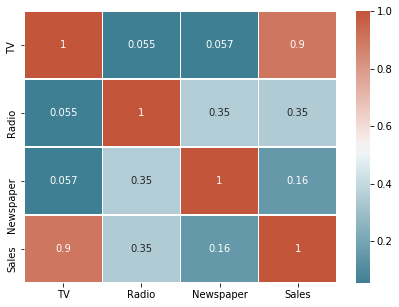

In [11]:
plt.figure(figsize = (7, 5))
custom_cmap = sns.diverging_palette(220, 20, as_cmap=True) # adding more "aesthetic" colors
sns.heatmap(ad.corr(), annot = True, linewidths=.5, cmap = custom_cmap)
plt.show()

5. As we found out, the investment made on TV is highly associated with the Sales recorded. Using a scatter plot, display this association between `TV` and `Sales`.

    https://seaborn.pydata.org/generated/seaborn.scatterplot.html

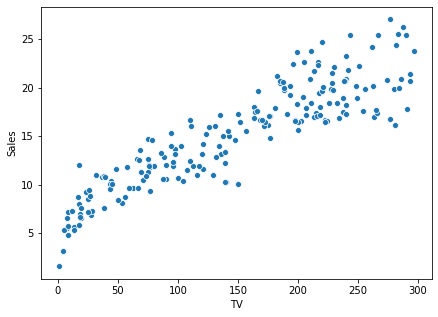

In [12]:
plt.figure(figsize = (7, 5))
sns.scatterplot(data = ad, x = "TV", y = "Sales")
plt.show()

6. How about visualizing the relationship between `Radio` vs `Sales` and `Newspaper` vs `Sales`

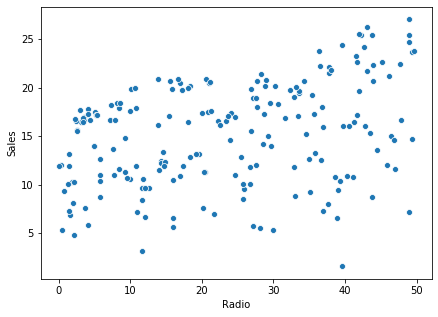

In [13]:
plt.figure(figsize = (7, 5))
sns.scatterplot(data = ad, x = "Radio", y = "Sales")
plt.show()

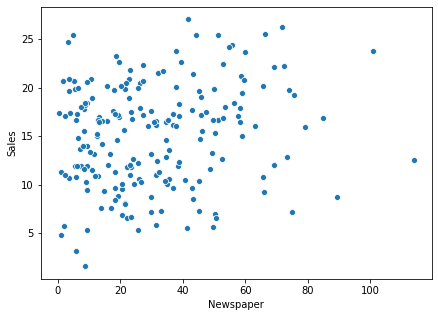

In [14]:
plt.figure(figsize = (7, 5))
sns.scatterplot(data = ad, x = "Newspaper", y = "Sales")
plt.show()

7. Using a pairplot, build a visualization that summarizes the distribution of data between features. Make sure all squares are scatter plots and the diagonal represents an histogram plot.

    https://seaborn.pydata.org/generated/seaborn.pairplot.html

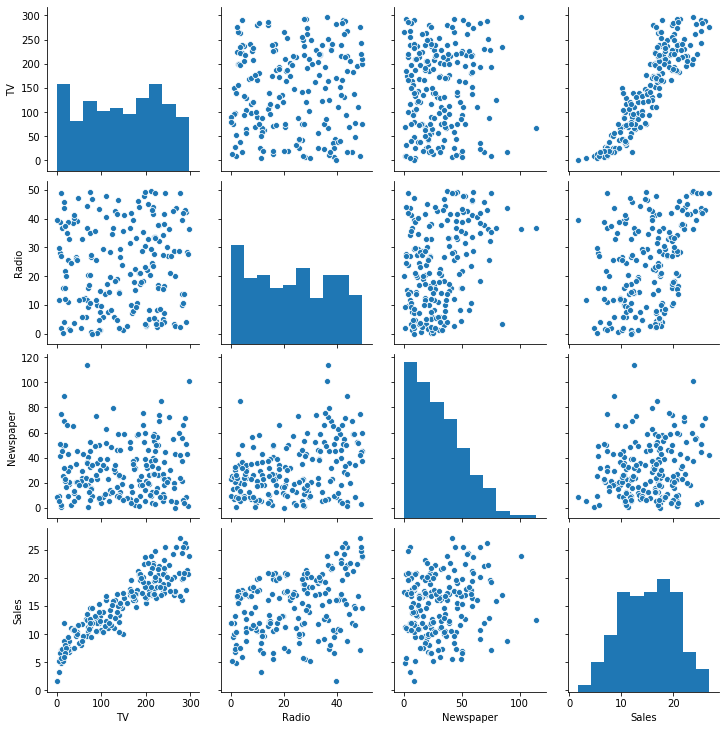

In [15]:
sns.pairplot(ad, kind = 'scatter', diag_kind = 'hist')
plt.show()

---
# Linear Regression

## Method 1: Statsmodel

Now let's do some predictive analysis! Using statsmodel, see if you can understand what we are doing in this code below. What can you say about the coefficients and overall model's performance?

In [16]:
import statsmodels.api as sm # Method 1
import statsmodels.formula.api as smf # Method 2
from statsmodels.iolib.summary2 import summary_col # To compare models

In [17]:
# Method 1
x = ad[['Radio']]
y = ad[['Sales']]

x = sm.add_constant(x)
model = sm.OLS(y, x).fit()

In [18]:
# Method 2
model = smf.ols('Sales ~ Radio', data = ad).fit()

In [19]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.122
Model:                            OLS   Adj. R-squared:                  0.118
Method:                 Least Squares   F-statistic:                     27.57
Date:                Wed, 09 Dec 2020   Prob (F-statistic):           3.88e-07
Time:                        17:02:37   Log-Likelihood:                -603.18
No. Observations:                 200   AIC:                             1210.
Df Residuals:                     198   BIC:                             1217.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.2357      0.653     18.724      0.0

8. Build a simple regression that uses `TV` to predict `Sales`. Print the summary report. What can you conclude?

In [20]:
model = smf.ols('Sales ~ TV ', data = ad).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     856.2
Date:                Wed, 09 Dec 2020   Prob (F-statistic):           7.93e-74
Time:                        17:02:37   Log-Likelihood:                -448.99
No. Observations:                 200   AIC:                             902.0
Df Residuals:                     198   BIC:                             908.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.9748      0.323     21.624      0.0

In this example, we will create a new variable `dummy_feature` that variates slightly and randomly from `TV` in ortder to show how correlated these variables are.

In [21]:
import random
ad['dummy_feature'] = [x + random.randint(0, 50) for x in ad['TV']]

In [22]:
ad[['TV','dummy_feature', 'Sales']].corr()

,TV,dummy_feature,Sales
TV,1.000000,0.985993,0.901208
dummy_feature,0.985993,1.000000,0.889781
Sales,0.901208,0.889781,1.000000


In [23]:
ad.drop(columns = 'dummy_feature', inplace = True)

9. State several models (m1, m2, ..., mn) which corresponds to predicting the variable `Sales` by using all possible combinations of predictive variables (`TV`, `Radio`, and `Newspaper`) and then draw a summary report that allows to compare all models at once. 

In [24]:
# Comparing several models
m1 = smf.ols('Sales ~ Radio', data = ad).fit()
m2 = smf.ols('Sales ~ Newspaper', data = ad).fit()
m3 = smf.ols('Sales ~ TV', data = ad).fit()
m4 = smf.ols('Sales ~ TV + Radio', data = ad).fit()
m5 = smf.ols('Sales ~ TV + Newspaper', data = ad).fit()
m6 = smf.ols('Sales ~ Radio + Newspaper', data = ad).fit()
m7 = smf.ols('Sales ~ TV + Radio + Newspaper', data = ad).fit()

In [25]:
print(summary_col([m1, m2, m3, m4, m5, m6, m7], stars = True, 
            info_dict = {'N': lambda x: "{}".format(int(x.nobs)),
                         'R2': lambda x: "{:.3}".format(x.rsquared),
                         'ADJR2': lambda x: "{:.3}".format(x.rsquared_adj)}))


           Sales I    Sales II  Sales III Sales IIII Sales IIIII Sales IIIIII Sales IIIIIII
-------------------------------------------------------------------------------------------
Intercept 12.2357*** 13.9595*** 6.9748*** 4.6309***  6.2347***   12.0607***   4.6251***    
          (0.6535)   (0.6383)   (0.3226)  (0.2903)   (0.3754)    (0.7285)     (0.3075)     
Newspaper            0.0383**                        0.0260***   0.0095       0.0003       
                     (0.0170)                        (0.0073)    (0.0173)     (0.0058)     
R-squared 0.1178     0.0200     0.8112    0.9016     0.8219      0.1147       0.9011       
          0.1222     0.0250     0.8122    0.9026     0.8236      0.1236       0.9026       
Radio     0.1244***                       0.1072***              0.1195***    0.1070***    
          (0.0237)                        (0.0079)               (0.0254)     (0.0085)     
TV                              0.0555*** 0.0544***  0.0551***                0

## Method 2: Sklearn

10. Let's try a more machine learning approach now. Using Scikit-Learn, build a Linear Regression model that uses `TV` to predict `Sales`.

    https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [26]:
from sklearn.linear_model import LinearRegression

In [51]:
ad = pd.read_csv('advertising.csv')

In [52]:
x = ad[['TV', 'Radio']]
y = ad[['Sales']]

reg = LinearRegression()

model = reg.fit(x, y)

In [53]:
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

11. Print the model's intercept and coefficient values

In [54]:
print(model.intercept_)
print(model.coef_)

[4.63087946]
[[0.05444896 0.10717457]]


12. Create a new variable called `Sales_pred` which corresponds to the predictions of `Sales` based on `TV`

In [55]:
ad['Sales_pred'] = model.predict(x)

In [56]:
ad.head()

,TV,Radio,Newspaper,Sales,Sales_pred
0,230.1,37.8,69.2,22.1,21.210784
1,44.5,39.3,45.1,10.4,11.265819
2,17.2,45.9,69.3,12.0,10.486714
3,151.5,41.3,58.5,16.5,17.306207
4,180.8,10.8,58.4,17.9,15.632737


13. Create 2 new columns (`MSE` and `MAE`) which correspond to the Mean Squared Error and Mean Absolute Error and sum the columns to get the overall Error.

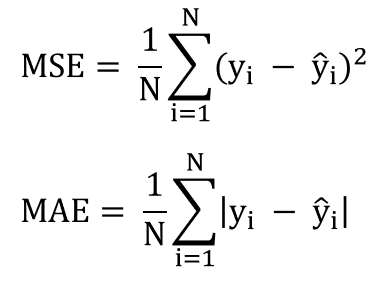

In [57]:
ad['MSE'] = (ad['Sales'] - ad['Sales_pred'])**2/ad.shape[0]
ad['MAE'] = abs(ad['Sales'] - ad['Sales_pred'])/ad.shape[0]

In [58]:
ad.head(2)

,TV,Radio,Newspaper,Sales,Sales_pred,MSE,MAE
0,230.1,37.8,69.2,22.1,21.210784,0.003954,0.004446
1,44.5,39.3,45.1,10.4,11.265819,0.003748,0.004329


In [59]:
print(ad['MSE'].sum())
print(ad['MAE'].sum())

2.7060525778834883
1.2367636706717362


14. Instead of having to write this by hand, use sklearn and import the following metrics
    * R2
    * MSE
    * MAE
    
    Use them to access the error on our model
    
    https://scikit-learn.org/stable/modules/model_evaluation.html

In [60]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

print('R2 = {}'.format(r2_score(ad['Sales'], ad['Sales_pred'])))
print('MSE = {}'.format(mean_squared_error(ad['Sales'], ad['Sales_pred'])))
print('MAE = {}'.format(mean_absolute_error(ad['Sales'], ad['Sales_pred'])))

R2 = 0.9025896186081139
MSE = 2.7060525778834883
MAE = 1.2367636706717362


15. Draw a scatter plots that represents the observed sales values by the TV investment. Then, build a lineplot on top that represents the same data relationship.

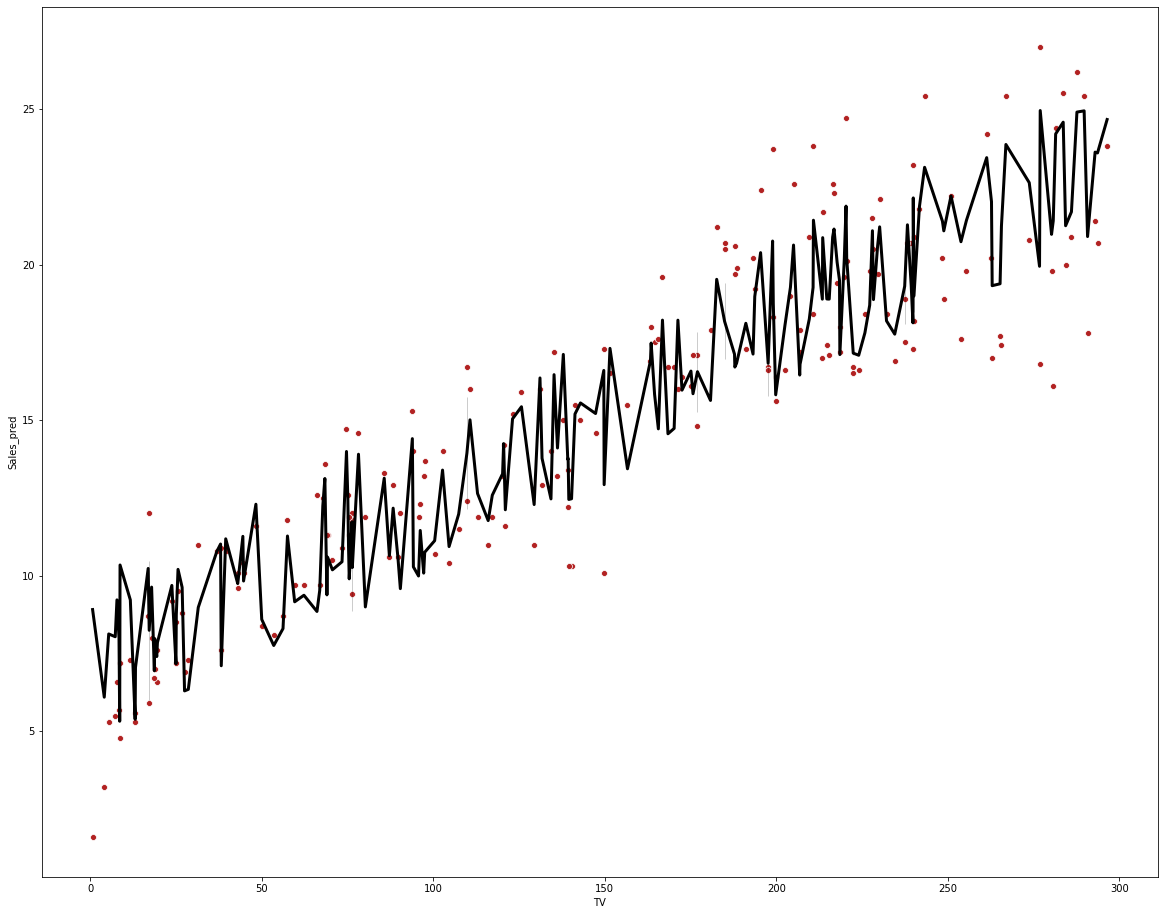

In [61]:
plt.figure(figsize = (20, 16))
sns.scatterplot(data = ad, x = 'TV', y = 'Sales', color = 'firebrick')
sns.lineplot(data = ad, x = 'TV', y = 'Sales_pred', color = 'black', linewidth = 3)
plt.show()

# Extra: Train-Test Split

In [74]:
ad = pd.read_csv('advertising.csv')

In [86]:
# Train test split
# 80% - Train
# 20% - Test

from sklearn.model_selection import train_test_split
train, test = train_test_split(ad, test_size = 0.2, random_state = 0)

In [87]:
print(train.shape)
print(test.shape)

(160, 4)
(40, 4)


In [88]:
# split x and y

# Train
x_train = train[['TV', 'Radio']]
y_train = train[['Sales']]

# Test
x_test = test[['TV', 'Radio']]
y_test = test[['Sales']]

In [89]:
reg = LinearRegression()

model = reg.fit(x_train, y_train)

In [90]:
# Train
y_pred = model.predict(x_train)

train['Sales_pred'] = y_pred

In [91]:
print('Train R2 = {}'.format(r2_score(train['Sales'], train['Sales_pred'])))
print('Train MSE = {}'.format(mean_squared_error(train['Sales'], train['Sales_pred'])))
print('Train MAE = {}'.format(mean_absolute_error(train['Sales'], train['Sales_pred'])))

Train R2 = 0.9130218535776822
Train MSE = 2.272475279532985
Train MAE = 1.1908262999958537


In [92]:
# Test
y_pred = model.predict(x_test)

test['Sales_pred'] = y_pred

In [93]:
test.head()

,TV,Radio,Newspaper,Sales,Sales_pred
18,69.2,20.5,18.3,11.3,10.680007
170,50.0,11.6,18.4,8.4,8.672897
107,90.4,0.3,23.2,12.0,9.596274
98,289.7,42.3,51.2,25.4,24.893410
177,170.2,7.8,35.2,16.7,14.697364


In [94]:
print('Test R2 = {}'.format(r2_score(test['Sales'], test['Sales_pred'])))
print('Test MSE = {}'.format(mean_squared_error(test['Sales'], test['Sales_pred'])))
print('Test MAE = {}'.format(mean_absolute_error(test['Sales'], test['Sales_pred'])))

Test R2 = 0.8658755781123507
Test MSE = 4.476818366208145
Test MAE = 1.4032867136894105


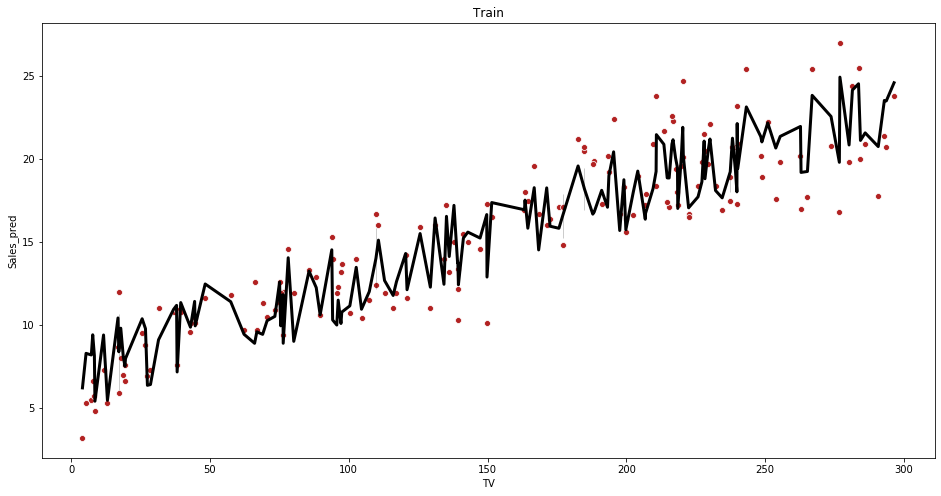

In [95]:
plt.figure(figsize = (16, 8))
sns.scatterplot(data = train, x = 'TV', y = 'Sales', color = 'firebrick')
sns.lineplot(data = train, x = 'TV', y = 'Sales_pred', color = 'black', linewidth = 3)
plt.title('Train')
plt.show()

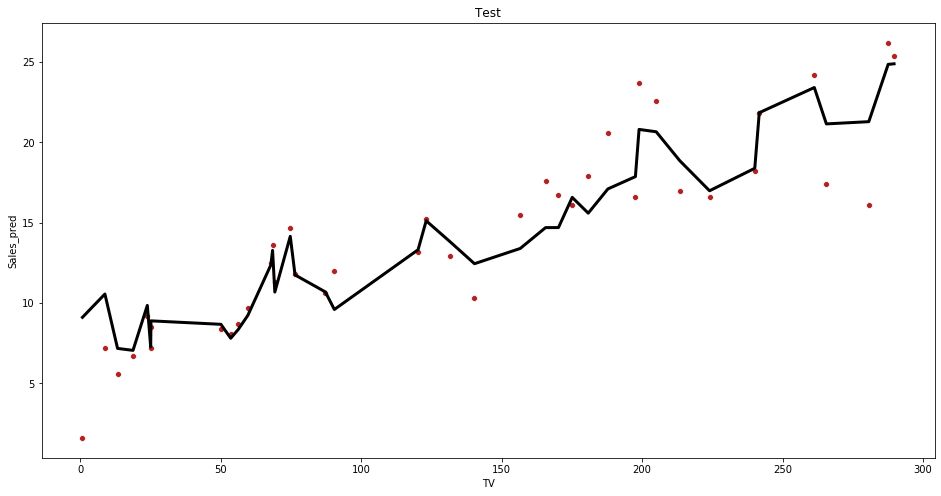

In [96]:
plt.figure(figsize = (16, 8))
sns.scatterplot(data = test, x = 'TV', y = 'Sales', color = 'firebrick')
sns.lineplot(data = test, x = 'TV', y = 'Sales_pred', color = 'black', linewidth = 3)
plt.title('Test')
plt.show()